In [1]:
# 2021 / 07 / 09
# Dongil Choi
# Dual-Motion Inverted Pendulum Model

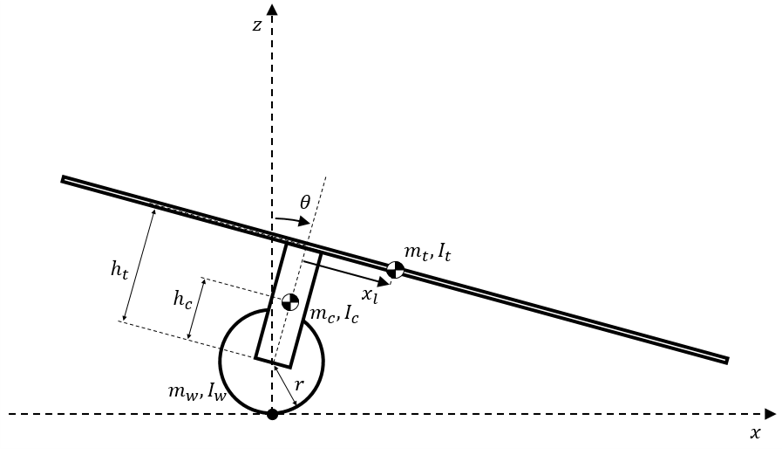

In [2]:
from IPython.display import Image
Image('figure/dualmotion_segway.png', width=500)

In [3]:
from EoM import *
from sympy import symbols, factor
from sympy import simplify
from sympy.physics.mechanics import *
from sympy import sin, cos, symbols, Matrix, solve
from sympy.physics.vector import init_vprinting
init_vprinting()

In [4]:
# Define Symbolic Variables
x,x_l,theta = dynamicsymbols('x,x_l,theta')
phi = dynamicsymbols('phi')
F,F_l = dynamicsymbols('F,F_l')
r,h_c,h_t = symbols('r,h_c,h_t')
I_w,I_c,I_t = symbols('I_w,I_c,I_t')
m_w, m_c, m_t, g, t = symbols('m_w, m_c, m_t, g, t')

In [5]:
# Newtonian Reference Frames
N = ReferenceFrame('N')
No = Point('No') 
No.set_vel(N, 0)

# Wheel Center Point
Wo = No.locatenew('Wo', x*N.x + r*N.z)
Wo.set_vel(N, Wo.pos_from(No).diff(t, N))

# Pendulum 
P = N.orientnew('P', 'Axis', [theta, N.y])
Po = Wo.locatenew('Po', h_c*P.z)
Po.set_vel(P, 0)
J_pend = inertia(P, 0, I_c, 0)
Pend = RigidBody('Pend', Po, P, m_c, (J_pend, Po))

# Torso
T = P.orientnew('T', 'Axis', [0, P.y])
To = Wo.locatenew('To', x_l*P.x + h_t*P.z)
To.set_vel(T, 0)
J_torso = inertia(T, 0, I_t, 0)
Torso = RigidBody('Torso', To, T, m_t, (J_torso, To))

# Wheel 
W = P.orientnew('W', 'Axis', [phi, P.y])
Wo.set_vel(W, 0)
J_wheel = inertia(W, 0, I_w, 0)
Wheel = RigidBody('Wheel', Wo, W, m_w, (J_wheel, Wo))

In [6]:
# Confirmation of Position, Velocity and Acceleration
Wo.pos_from(No).express(N).args[0][0], Wo.vel(N).express(N).args[0][0], Wo.acc(N).express(N).args[0][0]

⎛⎡x⎤  ⎡ẋ⎤  ⎡ẍ⎤⎞
⎜⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎟
⎜⎢0⎥, ⎢0⎥, ⎢0⎥⎟
⎜⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎟
⎝⎣r⎦  ⎣0⎦  ⎣0⎦⎠

In [7]:
# Confirmation of Position, Velocity and Acceleration
Po.pos_from(No).express(N).args[0][0], Po.vel(N).express(N).args[0][0], Po.acc(N).express(N).args[0][0]

⎛                                      ⎡              2                   ⎤⎞
⎜⎡h_c⋅sin(θ) + x⎤  ⎡h_c⋅cos(θ)⋅θ̇ + ẋ⎤  ⎢- h_c⋅sin(θ)⋅θ̇  + h_c⋅cos(θ)⋅θ̈ + ẍ⎥⎟
⎜⎢              ⎥  ⎢                ⎥  ⎢                                  ⎥⎟
⎜⎢      0       ⎥, ⎢       0        ⎥, ⎢                0                 ⎥⎟
⎜⎢              ⎥  ⎢                ⎥  ⎢                                  ⎥⎟
⎜⎣h_c⋅cos(θ) + r⎦  ⎣ -h_c⋅sin(θ)⋅θ̇  ⎦  ⎢                              2   ⎥⎟
⎝                                      ⎣  -h_c⋅sin(θ)⋅θ̈ - h_c⋅cos(θ)⋅θ̇    ⎦⎠

In [8]:
# Confirmation of Position, Velocity and Acceleration
To.pos_from(No).express(N).args[0][0], To.vel(N).express(N).args[0][0], To.acc(N).express(N).args[0][0]

⎛                                                                     ⎡⎛      
⎜⎡hₜ⋅sin(θ) + x + xₗ⋅cos(θ)⎤  ⎡(hₜ⋅θ̇ + xₗ̇)⋅cos(θ) - xₗ⋅sin(θ)⋅θ̇ + ẋ⎤  ⎢⎝hₜ
⎜⎢                         ⎥  ⎢                                    ⎥  ⎢       
⎜⎢            0            ⎥, ⎢                 0                  ⎥, ⎢       
⎜⎢                         ⎥  ⎢                                    ⎥  ⎢       
⎜⎣hₜ⋅cos(θ) + r - xₗ⋅sin(θ)⎦  ⎣ -(hₜ⋅θ̇ + xₗ̇)⋅sin(θ) - xₗ⋅cos(θ)⋅θ̇  ⎦  ⎢   ⎛
⎝                                                                     ⎣ - ⎝hₜ⋅

     2     ⎞                                                   ⎤⎞
⋅θ̈ - xₗ⋅θ̇  + xₗ̈⎠⋅cos(θ) + (-(hₜ⋅θ̇ + xₗ̇)⋅θ̇ - xₗ⋅θ̈ - θ̇⋅xₗ̇)⋅sin(θ) + ẍ⎥
                                                               ⎥⎟
                           0                                   ⎥⎟
                                                               ⎥⎟
           2     ⎞                                                ⎥⎟
θ̈ - xₗ⋅θ̇  + xₗ̈⎠⋅sin(θ) + (-(hₜ⋅

In [9]:
# Confirmation of dcm, angular velocity and acceleration
P.dcm(N), P.ang_vel_in(N).express(N).args[0][0], P.ang_acc_in(N).express(N).args[0][0]

⎛⎡cos(θ)  0  -sin(θ)⎤  ⎡0⎤  ⎡0⎤⎞
⎜⎢                  ⎥  ⎢ ⎥  ⎢ ⎥⎟
⎜⎢  0     1     0   ⎥, ⎢θ̇⎥, ⎢θ̈⎥⎟
⎜⎢                  ⎥  ⎢ ⎥  ⎢ ⎥⎟
⎝⎣sin(θ)  0  cos(θ) ⎦  ⎣0⎦  ⎣0⎦⎠

In [10]:
# Confirmation of dcm, angular velocity and acceleration
T.dcm(N), T.ang_vel_in(N).express(N).args[0][0], T.ang_acc_in(N).express(N).args[0][0]

⎛⎡cos(θ)  0  -sin(θ)⎤  ⎡0⎤  ⎡0⎤⎞
⎜⎢                  ⎥  ⎢ ⎥  ⎢ ⎥⎟
⎜⎢  0     1     0   ⎥, ⎢θ̇⎥, ⎢θ̈⎥⎟
⎜⎢                  ⎥  ⎢ ⎥  ⎢ ⎥⎟
⎝⎣sin(θ)  0  cos(θ) ⎦  ⎣0⎦  ⎣0⎦⎠

In [11]:
# Confirmation of dcm, angular velocity and acceleration
W.dcm(N), W.ang_vel_in(N).express(N).args[0][0], W.ang_acc_in(N).express(N).args[0][0]

⎛⎡-sin(φ)⋅sin(θ) + cos(φ)⋅cos(θ)  0  -sin(φ)⋅cos(θ) - sin(θ)⋅cos(φ)⎤  ⎡  0  ⎤ 
⎜⎢                                                                 ⎥  ⎢     ⎥ 
⎜⎢              0                 1                0               ⎥, ⎢φ̇ + θ̇
⎜⎢                                                                 ⎥  ⎢     ⎥ 
⎝⎣sin(φ)⋅cos(θ) + sin(θ)⋅cos(φ)   0  -sin(φ)⋅sin(θ) + cos(φ)⋅cos(θ)⎦  ⎣  0  ⎦ 

 ⎡  0  ⎤⎞
 ⎢     ⎥⎟
⎥, ⎢φ̈ + θ̈⎥⎟
 ⎢     ⎥⎟
 ⎣  0  ⎦⎠

In [12]:
# point where the wheels contact the ground
Wn = Wo.locatenew('Wn', -r*N.z)
Wn.v2pt_theory(Wo, N, W)

In [13]:
# Rolling constraint
# Express the velocity of points in the inertial frame
constraints = Wn.vel(N).express(N).args[0][0]
simplify(constraints)

⎡-r⋅(φ̇ + θ̇) + ẋ⎤
⎢              ⎥
⎢      0       ⎥
⎢              ⎥
⎣      0       ⎦

In [14]:
con = solve(constraints, [phi.diff()])
con_rhs = Matrix(list(con.values()))
con_lhs = Matrix(list(con.keys()))

con_rhs, con_lhs

⎛⎡     ẋ⎤     ⎞
⎜⎢-θ̇ + ─⎥, [φ̇]⎟
⎝⎣     r⎦     ⎠

In [15]:
# Generalized coordinates
q = Matrix([[x], [x_l], [theta]])
qd = q.diff()
qdd = qd.diff()

In [16]:
# Define forces on system (point, vector) tuple:
flist = [(Wo, -m_w*g*N.z), 
         (Po, -m_c*g*N.z), 
         (To, -m_t*g*N.z), 
         (Wo, F*N.x), 
         (To, F_l*T.x),
         (P, -F_l*h_t*P.y)] 

In [17]:
# Lagranges Method
Lag = Lagrangian(N, Pend, Torso, Wheel)
nonslip_condition = {con_lhs[0]:con_rhs[0]}
Lag_constrainted = msubs(Lag, nonslip_condition)
Le = LagrangesMethod(Lag_constrainted, q, forcelist=flist, frame=N)
eoms = Le.form_lagranges_equations()
eoms_simple = simplify(eoms)
eoms_simple

⎡I_w⋅ẍ                   2                                    2              
⎢───── - h_c⋅m_c⋅sin(θ)⋅θ̇  + h_c⋅m_c⋅cos(θ)⋅θ̈ - hₜ⋅mₜ⋅sin(θ)⋅θ̇  + hₜ⋅mₜ⋅cos
⎢   2                                                                         
⎢  r                                                                          
⎢                                                                             
⎢                                                                             
⎢                                                               -g⋅mₜ⋅sin(θ) +
⎢                                                                             
⎢                                                                           2 
⎣    I_c⋅θ̈ + Iₜ⋅θ̈ - g⋅h_c⋅m_c⋅sin(θ) - g⋅hₜ⋅mₜ⋅sin(θ) - g⋅mₜ⋅xₗ⋅cos(θ) + h_c

                                             2                                
(θ)⋅θ̈ + m_c⋅ẍ - mₜ⋅xₗ⋅sin(θ)⋅θ̈ - mₜ⋅xₗ⋅cos(θ)⋅θ̇  - 2⋅mₜ⋅sin(θ)⋅θ̇⋅xₗ̇ + mₜ
                                                   

In [18]:
inv_dyn = get_Simplified_EoM(eoms_simple, q)
inv_dyn

⎡                                                                             
⎢                                                                             
⎢-2⋅mₜ⋅sin(θ)⋅θ̇⋅xₗ̇ + mₜ⋅cos(θ)⋅xₗ̈ + (-h_c⋅m_c⋅sin(θ) - hₜ⋅mₜ⋅sin(θ) - mₜ⋅xₗ
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                -g⋅mₜ⋅sin(θ) 
⎢                                                                             
⎢                                                                             
⎣         -g⋅(h_c⋅m_c⋅sin(θ) + hₜ⋅mₜ⋅sin(θ) + mₜ⋅xₗ⋅cos(θ)) + hₜ⋅mₜ⋅xₗ̈ + 2⋅mₜ

                                                                              
       2                                           

In [19]:
linearlize_eq = {sin(theta):theta, cos(theta):1, theta.diff():0, x_l:0}
inv_dyn_linear = msubs(inv_dyn, linearlize_eq)
inv_dyn_linear

⎡                                                 ⎛           2       2       
⎢                                                 ⎝I_w + m_c⋅r  + mₜ⋅r  + m_w⋅
⎢          mₜ⋅xₗ̈ + (h_c⋅m_c + hₜ⋅mₜ)⋅θ̈ - F - Fₗ + ──────────────────────────
⎢                                                                  2          
⎢                                                                 r           
⎢                                                                             
⎢                           -g⋅mₜ⋅θ + hₜ⋅mₜ⋅θ̈ + mₜ⋅ẍ + mₜ⋅xₗ̈ - Fₗ          
⎢                                                                             
⎢                                                            ⎛              2 
⎣-g⋅(h_c⋅m_c⋅θ + hₜ⋅mₜ⋅θ) + hₜ⋅mₜ⋅xₗ̈ + (h_c⋅m_c + hₜ⋅mₜ)⋅ẍ + ⎝I_c + Iₜ + h_c

 2⎞            ⎤
r ⎠⋅ẍ          ⎥
───────          ⎥
               ⎥
               ⎥
               ⎥
                  ⎥
               ⎥
        2   ⎞  ⎥
 ⋅m_c + hₜ ⋅mₜ⎠⋅θ̈⎦

In [20]:
# Control Input Variable
u = Matrix([[F], [F_l]])

# Inverse Dynamics Equation
# M(q)*qdd + C(q,qd) + G(q) = W*u
M, C, G, W = get_EoM_from_T(inv_dyn,qdd,g,u)
M, C, G, W

⎛⎡            I_w                                                             
⎜⎢            ─── + m_c + mₜ + m_w              mₜ⋅cos(θ)  h_c⋅m_c⋅cos(θ) + hₜ
⎜⎢              2                                                             
⎜⎢             r                                                              
⎜⎢                                                                            
⎜⎢                 mₜ⋅cos(θ)                       mₜ                         
⎜⎢                                                                            
⎜⎢                                                                          2 
⎝⎣h_c⋅m_c⋅cos(θ) + hₜ⋅mₜ⋅cos(θ) - mₜ⋅xₗ⋅sin(θ)    hₜ⋅mₜ       I_c + Iₜ + h_c ⋅

                         ⎤                                                    
⋅mₜ⋅cos(θ) - mₜ⋅xₗ⋅sin(θ)⎥  ⎡-(2⋅mₜ⋅sin(θ)⋅xₗ̇ + (h_c⋅m_c⋅sin(θ) + hₜ⋅mₜ⋅sin(θ
                         ⎥  ⎢                                                 
                         ⎥  ⎢                      

In [21]:
# Linearized Model
Ml, Cl, Gl, Wl = get_EoM_from_T(inv_dyn_linear,qdd,g,u)

# Physical Parameters
#param = {r:0.25, h_c:0.25, h_t:0.25, m_w:30, m_c:370, m_t:300, g:9.8}
param = {r:0.25, h_c:0.25, h_t:0.5, m_w:60, m_c:340, m_t:300, g:9.8}

# pendulum size
param['c_width'] = 0.7 #0.5
param['c_height'] = 0.2 #0.25

# torso size
param['t_width'] = 2.5
param['t_height'] = 0.5

# Moment of Inertia
param[I_w] = 1/2*param[m_w]*param[r]**2
param[I_c] = 1/12*param[m_c]*(param['c_width']**2 + param['c_height']**2)
param[I_t] = 1/12*param[m_t]*(param['t_width']**2 + param['t_height']**2)

Mlp = msubs(Ml, param)
Clp = msubs(Cl, param)
Glp = msubs(Gl, param)
Wlp = msubs(Wl, param)
Mlp, Clp, Glp, Wlp

⎛⎡730.0   300        235.0      ⎤  ⎡0⎤  ⎡    0    ⎤  ⎡1  1⎤⎞
⎜⎢                              ⎥  ⎢ ⎥  ⎢         ⎥  ⎢    ⎥⎟
⎜⎢ 300    300        150.0      ⎥, ⎢0⎥, ⎢-2940.0⋅θ⎥, ⎢0  1⎥⎟
⎜⎢                              ⎥  ⎢ ⎥  ⎢         ⎥  ⎢    ⎥⎟
⎝⎣235.0  150.0  273.766666666667⎦  ⎣0⎦  ⎣-2303.0⋅θ⎦  ⎣0  0⎦⎠

In [22]:
# Forward Dynamics eqation
# qdd = M(q)^-1 * ( -C(q,qd) - G(q) + W*u )
Mlp_inv = simplify(Mlp.inv())
qdd_rhs_A = simplify(Mlp_inv*(-Clp -Glp))
qdd_rhs_B = simplify(Mlp_inv*Wlp*u)
qdd_rhs_A, qdd_rhs_B

⎛⎡-8.37346528410882⋅θ⎤  ⎡0.00254032223708538⋅F + 0.00054316801145126⋅Fₗ ⎤⎞
⎜⎢                   ⎥  ⎢                                               ⎥⎟
⎜⎢14.2876413301865⋅θ ⎥, ⎢-0.00199715422563412⋅F + 0.00416406088025879⋅Fₗ⎥⎟
⎜⎢                   ⎥  ⎢                                               ⎥⎟
⎝⎣7.77164790784462⋅θ ⎦  ⎣-0.00108633602290252⋅F - 0.00274779111675343⋅Fₗ⎦⎠

In [23]:
# Nonlinear Dynamics Model
Mp = msubs(M, param)
Cp = msubs(C, param)
Gp = msubs(G, param)
Wp = msubs(W, param)
Mp, Cp, Gp, Wp

⎛⎡            730.0              300⋅cos(θ)  -300⋅xₗ⋅sin(θ) + 235.0⋅cos(θ)⎤  ⎡
⎜⎢                                                                        ⎥  ⎢
⎜⎢         300⋅cos(θ)               300                  150.0            ⎥  ⎢
⎜⎢                                                                        ⎥, ⎢
⎜⎢                                                  2                     ⎥  ⎢
⎝⎣-300⋅xₗ⋅sin(θ) + 235.0⋅cos(θ)    150.0      300⋅xₗ  + 273.766666666667  ⎦  ⎣

-((300⋅xₗ⋅cos(θ) + 235.0⋅sin(θ))⋅θ̇ + 600⋅sin(θ)⋅xₗ̇)⋅θ̇⎤                     
                                                     ⎥  ⎡                0    
                              2                      ⎥  ⎢                     
                     -300⋅xₗ⋅θ̇                       ⎥, ⎢         -2940.0⋅sin
                                                     ⎥  ⎢                     
                     600⋅xₗ⋅θ̇⋅xₗ̇                     ⎦  ⎣-2940.0⋅xₗ⋅cos(θ) -

                             ⎞
            ⎤  ⎡1  

In [24]:
# Forward Dynamics eqation
# qdd = M(q)^-1 * ( -C(q,qd) - G(q) + W*u )
Mp_inv = (Mp.inv())
qdd_rhs_A_nonL = (Mp_inv*(-Cp -Gp))
qdd_rhs_B_nonL = (Mp_inv*Wp*u)
qdd_rhs_A_nonL, qdd_rhs_B_nonL

⎛⎡                                                                            
⎜⎢                                                                   ((300⋅xₗ⋅
⎜⎢────────────────────────────────────────────────────────────────────────────
⎜⎢                     2    2       4                     2    2       2      
⎜⎢- 62.6564025878906⋅xₗ ⋅sin (θ)⋅cos (θ) - 1.294947e+18⋅xₗ ⋅sin (θ)⋅cos (θ) + 
⎜⎢                                                                            
⎜⎢                                                                            
⎜⎢                                  ((300⋅xₗ⋅cos(θ) + 235.0⋅sin(θ))⋅θ̇ + 600⋅s
⎜⎢                     ───────────────────────────────────────────────────────
⎜⎢                                            2    2       4                  
⎜⎢                     - 0.0858306884765625⋅xₗ ⋅sin (θ)⋅cos (θ) - 1.7739e+15⋅x
⎜⎢                                                                            
⎜⎢                                                  

In [25]:
# State-space equation. 
X = q.col_join(qd)
Xd_A = qd.col_join(qdd_rhs_A)
Xd_B = qd.col_join(qdd_rhs_B)
U = u
X, U, Xd_A, Xd_B

⎛⎡x ⎤        ⎡         ẋ         ⎤  ⎡                       ẋ               
⎜⎢  ⎥        ⎢                   ⎥  ⎢                                         
⎜⎢xₗ⎥        ⎢        xₗ̇         ⎥  ⎢                      xₗ̇               
⎜⎢  ⎥        ⎢                   ⎥  ⎢                                         
⎜⎢θ ⎥  ⎡F ⎤  ⎢         θ̇         ⎥  ⎢                       θ̇               
⎜⎢  ⎥, ⎢  ⎥, ⎢                   ⎥, ⎢                                         
⎜⎢ẋ ⎥  ⎣Fₗ⎦  ⎢-8.37346528410882⋅θ⎥  ⎢0.00254032223708538⋅F + 0.00054316801145
⎜⎢  ⎥        ⎢                   ⎥  ⎢                                         
⎜⎢xₗ̇⎥        ⎢14.2876413301865⋅θ ⎥  ⎢-0.00199715422563412⋅F + 0.0041640608802
⎜⎢  ⎥        ⎢                   ⎥  ⎢                                         
⎝⎣θ̇ ⎦        ⎣7.77164790784462⋅θ ⎦  ⎣-0.00108633602290252⋅F - 0.0027477911167

        ⎤⎞
      ⎥⎟
        ⎥⎟
      ⎥⎟
        ⎥⎟
      ⎥⎟
126⋅Fₗ ⎥⎟
      ⎥⎟
5879⋅Fₗ⎥⎟
      ⎥⎟
5343⋅Fₗ⎦⎠

In [26]:
# State-space equation
A = simplify(Xd_A.jacobian(X))
B = simplify(Xd_B.jacobian(U))
C = simplify(X.jacobian(X))
D = simplify(X.jacobian(U))
A, B, C, D

⎛⎡0  0          0          1  0  0⎤  ⎡         0                     0        
⎜⎢                                ⎥  ⎢                                        
⎜⎢0  0          0          0  1  0⎥  ⎢         0                     0        
⎜⎢                                ⎥  ⎢                                        
⎜⎢0  0          0          0  0  1⎥  ⎢         0                     0        
⎜⎢                                ⎥, ⎢                                        
⎜⎢0  0  -8.37346528410882  0  0  0⎥  ⎢0.00254032223708538   0.0005431680114512
⎜⎢                                ⎥  ⎢                                        
⎜⎢0  0  14.2876413301865   0  0  0⎥  ⎢-0.00199715422563412  0.0041640608802587
⎜⎢                                ⎥  ⎢                                        
⎝⎣0  0  7.77164790784462   0  0  0⎦  ⎣-0.00108633602290252  -0.002747791116753

  ⎤  ⎡1  0  0  0  0  0⎤  ⎡0  0⎤⎞
  ⎥  ⎢                ⎥  ⎢    ⎥⎟
  ⎥  ⎢0  1  0  0  0  0⎥  ⎢0  0⎥⎟
  ⎥  ⎢                ⎥  ⎢    ⎥

In [27]:
#
import pylab as pl
import control

ss0 = [A, B, C, D]
sys0 = control.ss(*[pl.array(mat_i.subs(param)).astype(float) for mat_i in ss0])
mprint(sys0)

A = [[ 0.          0.          0.          1.          0.          0.        ]
     [ 0.          0.          0.          0.          1.          0.        ]
     [ 0.          0.          0.          0.          0.          1.        ]
     [ 0.          0.         -8.37346528  0.          0.          0.        ]
     [ 0.          0.         14.28764133  0.          0.          0.        ]
     [ 0.          0.          7.77164791  0.          0.          0.        ]]

B = [[ 0.          0.        ]
     [ 0.          0.        ]
     [ 0.          0.        ]
     [ 0.00254032  0.00054317]
     [-0.00199715  0.00416406]
     [-0.00108634 -0.00274779]]

C = [[1. 0. 0. 0. 0. 0.]
     [0. 1. 0. 0. 0. 0.]
     [0. 0. 1. 0. 0. 0.]
     [0. 0. 0. 1. 0. 0.]
     [0. 0. 0. 0. 1. 0.]
     [0. 0. 0. 0. 0. 1.]]

D = [[0. 0.]
     [0. 0.]
     [0. 0.]
     [0. 0.]
     [0. 0.]
     [0. 0.]]



In [29]:
# select output variable as p_dot
sys0_output = sys0[3,0]
mprint(sys0_output)
tf_20 = tf_clean(control.minreal(control.ss2tf(sys0_output)))
tf_20

A = [[ 0.          0.          0.          1.          0.          0.        ]
     [ 0.          0.          0.          0.          1.          0.        ]
     [ 0.          0.          0.          0.          0.          1.        ]
     [ 0.          0.         -8.37346528  0.          0.          0.        ]
     [ 0.          0.         14.28764133  0.          0.          0.        ]
     [ 0.          0.          7.77164791  0.          0.          0.        ]]

B = [[ 0.        ]
     [ 0.        ]
     [ 0.        ]
     [ 0.00254032]
     [-0.00199715]
     [-0.00108634]]

C = [[0. 0. 0. 1. 0. 0.]]

D = [[0.]]

0 states have been removed from the model


TransferFunction(array([ 0.00254032,  0.        , -0.01064609,  0.        ]), array([ 1.        ,  0.        , -7.77164791,  0.        ,  0.        ]))

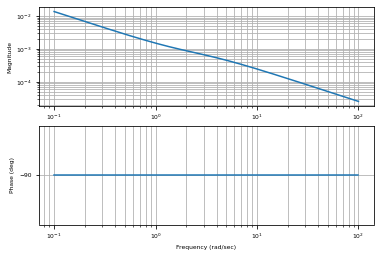

In [49]:
control.bode(tf_20);

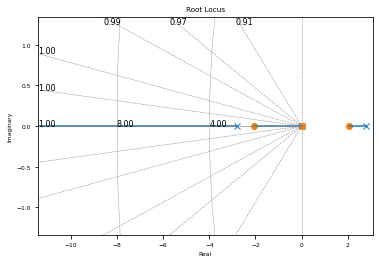

In [48]:
control.rlocus(tf_20);

In [32]:
#Q = pl.eye(sys0.A.shape[0])
#R = pl.eye(sys0.B.shape[1])*0.00001

# state : [x, x_l, theta, xdot, x_ldot, thetadot]
Q = Matrix([ [1,0,0,0,0,0],
             [0,5,0,0,0,0],
             [0,0,1,0,0,0],
             [0,0,0,1,0,0],
             [0,0,0,0,1,0],
             [0,0,0,0,0,1] ])
R = Matrix([ [0.0000001,0],
             [0,0.00001] ])

Q, R

⎛⎡1  0  0  0  0  0⎤                  ⎞
⎜⎢                ⎥                  ⎟
⎜⎢0  5  0  0  0  0⎥                  ⎟
⎜⎢                ⎥                  ⎟
⎜⎢0  0  1  0  0  0⎥  ⎡1.0e-7    0   ⎤⎟
⎜⎢                ⎥, ⎢              ⎥⎟
⎜⎢0  0  0  1  0  0⎥  ⎣  0     1.0e-5⎦⎟
⎜⎢                ⎥                  ⎟
⎜⎢0  0  0  0  1  0⎥                  ⎟
⎜⎢                ⎥                  ⎟
⎝⎣0  0  0  0  0  1⎦                  ⎠

In [33]:
K, S, E = control.lqr(sys0.A, sys0.B, Q, R)
K, S, E

(array([[ -1778.85661544,  -5846.22491087, -40015.08152731,
          -4074.06209044,  -5248.84212686, -13401.37922517],
        [  -261.45112625,    397.76443143,  -3196.44163361,
           -473.14917047,    165.96774315,  -1528.95828537]]),
 array([[ 1.96177107,  0.49976922,  6.38139187,  1.44924978,  0.6901747 ,
          2.28388062],
        [ 0.49976922,  3.72875181,  1.75309548,  0.66296117,  1.01524364,
          0.22199334],
        [ 6.38139187,  1.75309548, 56.21886397, 10.41017793,  4.27460149,
         20.16841545],
        [ 1.44924978,  0.66296117, 10.41017793,  2.25819937,  1.03980667,
          3.74405885],
        [ 0.6901747 ,  1.01524364,  4.27460149,  1.03980667,  0.98786301,
          1.09856749],
        [ 2.28388062,  0.22199334, 20.16841545,  3.74405885,  1.09856749,
          7.96921485]]),
 array([-11.1755905+0.j        ,  -1.5422407+1.5104295j ,
         -1.5422407-1.5104295j ,  -2.014458 +0.00668556j,
         -2.014458 -0.00668556j,  -1.0380883+0.j        

In [34]:
sysc = sys0.feedback(K)
sysc

StateSpace(array([[  0.        ,   0.        ,   0.        ,   1.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   1.        ],
       [  4.66088091,  14.63524223,  95.01394098,  10.60643002,
         13.243602  ,  34.87430288],
       [ -2.4639526 , -13.33212809, -52.31847027,  -6.16630837,
        -11.17384702, -20.39794577],
       [ -2.6508491 ,  -5.25799115, -44.48133054,  -5.7259155 ,
         -5.24596159, -18.759659  ]]), array([[ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.00254032,  0.00054317],
       [-0.00199715,  0.00416406],
       [-0.00108634, -0.00274779]]), array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
    

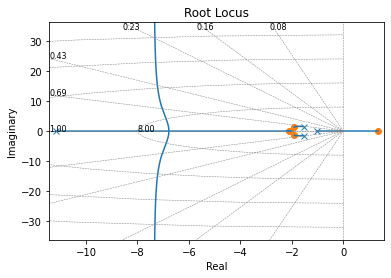

In [35]:
control.rlocus(sysc);

In [36]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [37]:
'''
# Open-loop Simulation
ss = sys0
def model_open(X, t, u):
    Aop = ss.A
    Bop = ss.B
    
    Xd = Aop@X + Bop.T[0]*u
    return Xd

# initial condition
x0 = [0,0,0.1,0,0,0]

# time points
t = np.linspace(0,2)

# solve ODEs
u = 0
y = odeint(model_open, x0, t, args=(u,))
pl.plot(t, y);
pl.legend(['p','theta','p_dot','theta_dot'], loc='best')
pl.grid()
'''

"\n# Open-loop Simulation\nss = sys0\ndef model_open(X, t, u):\n    Aop = ss.A\n    Bop = ss.B\n    \n    Xd = Aop@X + Bop.T[0]*u\n    return Xd\n\n# initial condition\nx0 = [0,0,0.1,0,0,0]\n\n# time points\nt = np.linspace(0,2)\n\n# solve ODEs\nu = 0\ny = odeint(model_open, x0, t, args=(u,))\npl.plot(t, y);\npl.legend(['p','theta','p_dot','theta_dot'], loc='best')\npl.grid()\n"

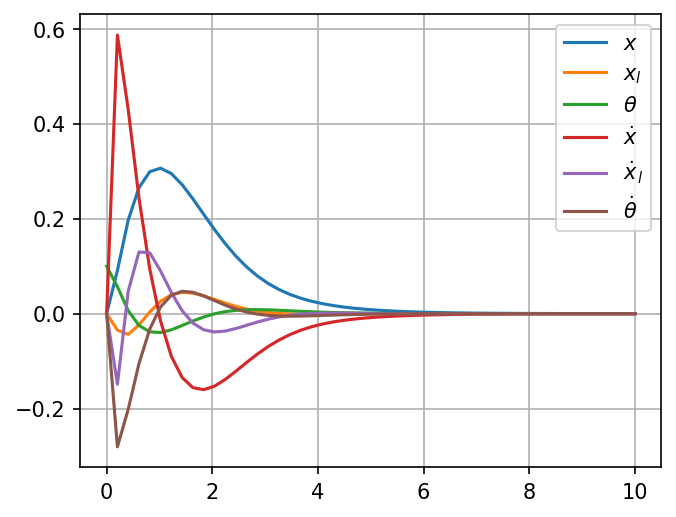

In [38]:
x0 = [0, 0, 0.1, 0, 0, 0]
u = 0
dt = 0.01
tf = 10

t, y = control.forced_response(sysc, X0=x0, T=pl.linspace(0,tf), transpose=True)

plt.figure(1, figsize=(5,4), dpi=150)
plt.plot(t, y);
plt.legend([r'$x$',r'$x_l$',r'$\theta$',r'$\dotx$',r'$\dotx_l$',r'$\dot\theta$'], loc='best')
plt.grid()

In [39]:
# Rough 한 조건식
vmax_ = 22/3.6
t_ = 20# sec

target_pos = vmax_*t_
v = vmax_/target_pos
a = v/4
a

Vmax : 30.403252247502316 km/r and Amax: 0.15573677653188356 g


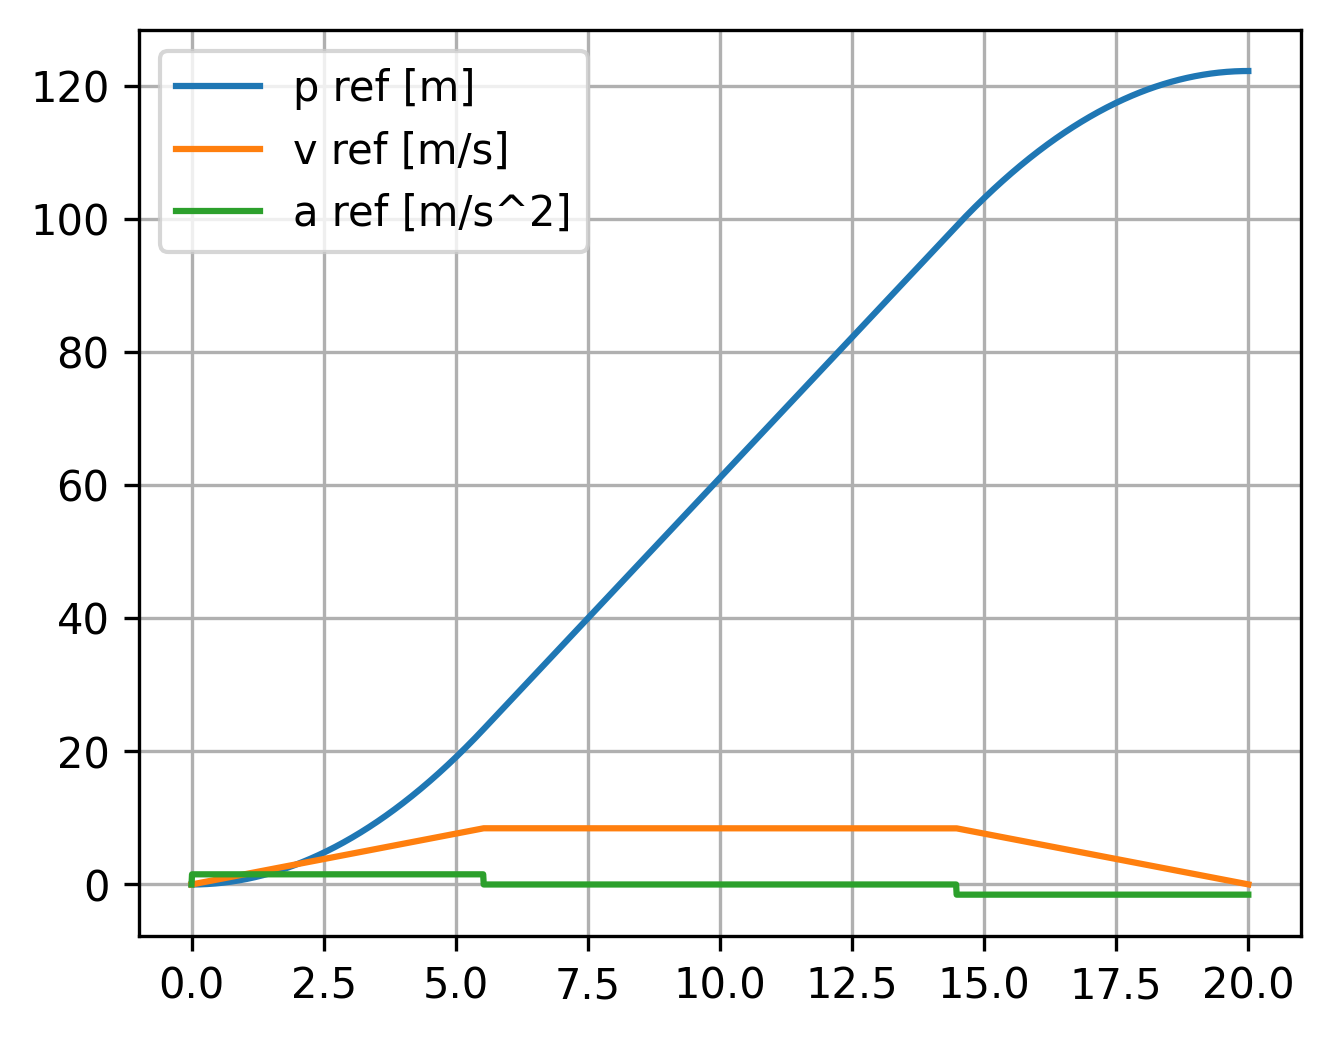

In [40]:
t_s, traj_s = Trapezoidal_Traj_Gen_Given_Amax_and_T(a,t_,0.01)

pl.figure(1, figsize=(5,4), dpi=300)
pl.plot(t_s, traj_s*target_pos)
pl.legend(['p ref [m]', 'v ref [m/s]', 'a ref [m/s^2]'], loc='best')
pl.grid()

print('Vmax :', max(traj_s[:,1])*target_pos*3.6, 'km/r and Amax:', max(traj_s[:,2])*target_pos/9.81, 'g')

In [41]:
x_des = traj_s[:,0]*target_pos
xdot_des = traj_s[:,1]*target_pos
xl_des = traj_s[:,2]*target_pos/4 # using acceleration as xl_des
zeros = np.zeros(len(traj_s))
Xdes = x_des
Xdes = np.vstack((Xdes, xl_des))
#Xdes = np.vstack((Xdes, zeros))
Xdes = np.vstack((Xdes, zeros)) 
Xdes = np.vstack((Xdes, xdot_des))
Xdes = np.vstack((Xdes, zeros))
Xdes = np.vstack((Xdes, zeros))
Xdes.shape, Xdes

((6, 2001),
 array([[ 0.00000000e+00,  7.63888889e-05,  3.05555556e-04, ...,
          1.22221917e+02,  1.22222146e+02,  1.22222146e+02],
        [ 0.00000000e+00,  3.81944444e-01,  3.81944444e-01, ...,
         -3.81944444e-01, -3.81944444e-01, -3.81944444e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  1.52777778e-02,  3.05555556e-02, ...,
          3.05555556e-02,  1.52777778e-02,  1.52777778e-02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]))

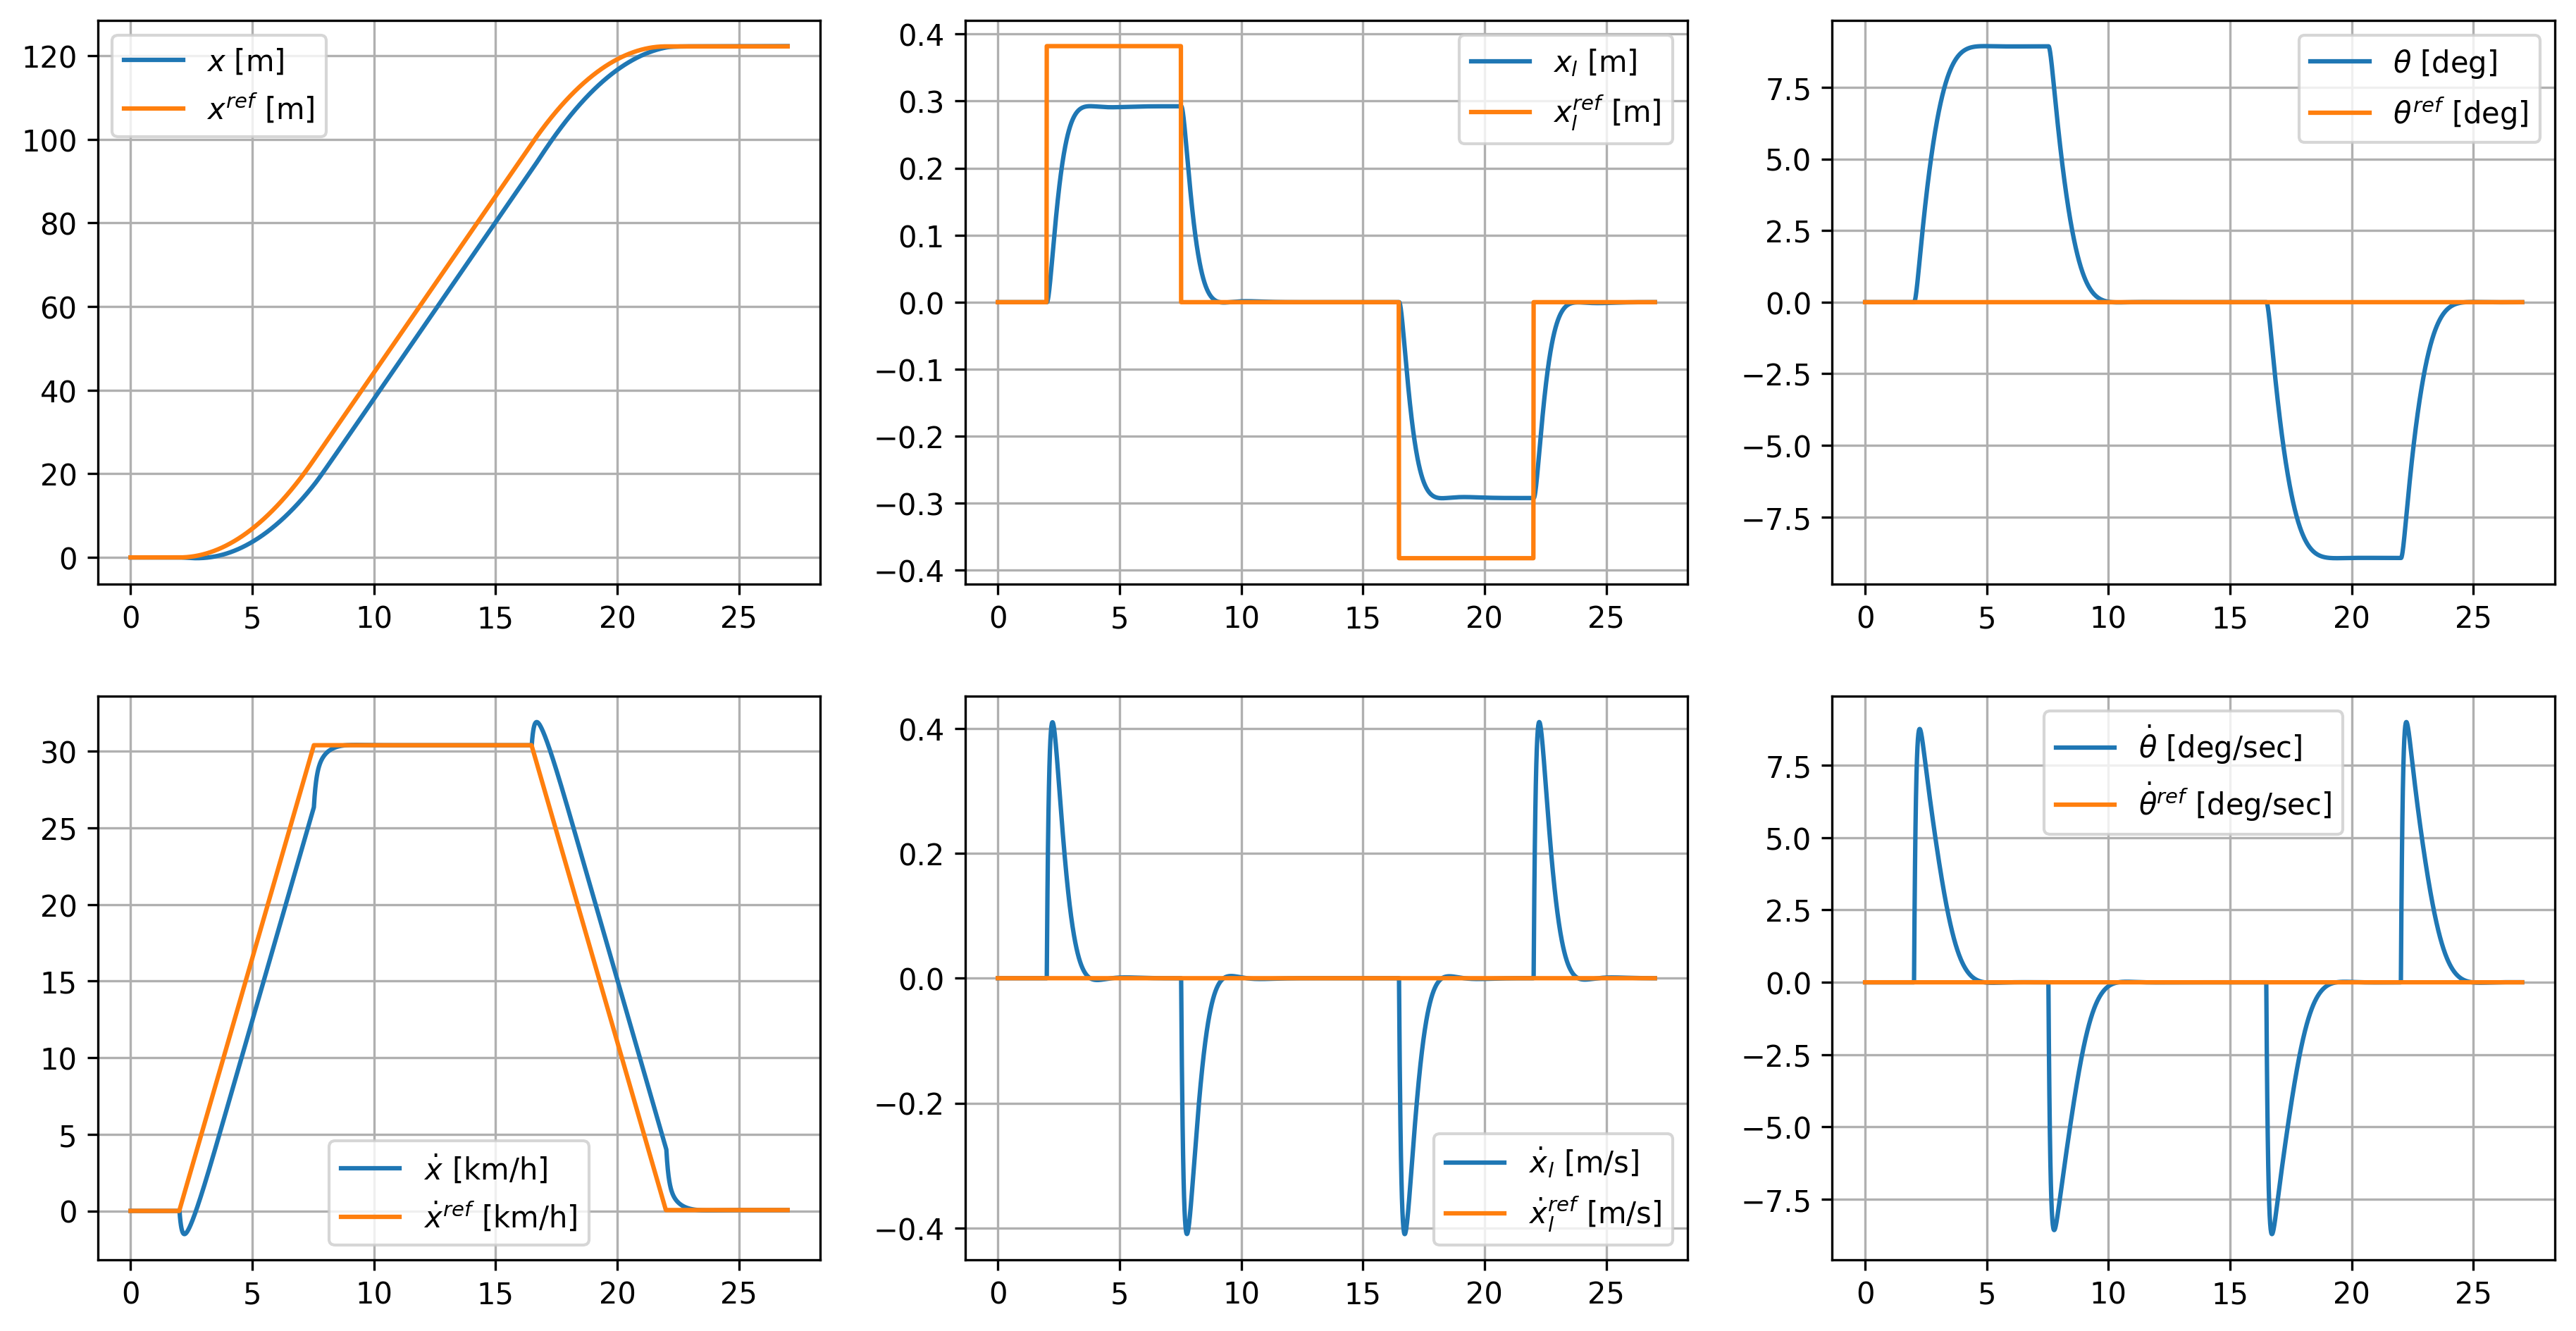

In [42]:
# Closed-loop Simulation
ss = sys0

rad2deg = 180/np.pi

def simulate_model_closed(X0, Xdes, K_gain, time_array, dt):
    Aop = ss.A
    Bop = ss.B
        
    t = 0
    j = 0
    X = Xref = Xd_prev = Xd = X0
    
    t_save = [0]
    x_save = xref_save = np.array([0,0,0,0,0,0])
    u_save = np.array([0,0])
    
    for i in range(len(time_array)):
        t = time_array[i]
         
        if t<2:
            Xref = X0       
        elif t>=2 and j<(Xdes.shape[1]):
            Xref = Xdes[:,j]
            j+=1
        else:
            Xdes_final = Xdes[:,Xdes.shape[1]-1]
            Xdes_final[1] = 0 # force to set xl_des as 0
            Xref = Xdes_final

        # full-state feedback
        #u = K@(Xgoal - X)

        # partial feedback
        u1 = K_gain[0][1:]@(Xref[1:] - X[1:])
        u2 = K_gain[1][1:]@(Xref[1:] - X[1:])
        
        # Forward Dynamics
        Xd_prev = Xd
        # Linear Model
        u = [u1, u2]
        Xd = Aop@X + Bop@u # Xd = [xd, x_ld, thetad, xdd, x_ldd, thetadd]
        # NonLinear Model
        #q_qd = {x:X[0], x_l:X[1], theta:X[2], x.diff():X[3], x_l.diff():X[4], theta.diff():X[5]}
        #q_qd[F] = u1
        #q_qd[F_l] = u2
        #qdd = msubs(qdd_rhs_A_nonL,q_qd) + msubs(qdd_rhs_B_nonL,q_qd)
        #Xd = np.array([X[3], X[4], X[5], float(qdd[0]), float(qdd[1]), float(qdd[2])])
        
        t_save = np.vstack((t_save, t))
        x_save = np.vstack((x_save, X))
        xref_save = np.vstack((xref_save, Xref))
        u_save = np.vstack((u_save, np.array([u1,u2])))
        
        X = X + Xd*dt
        t = t + dt
        i+=1
        
        #limit setting
        xl_limit = 0.5
        if X[1] >= xl_limit:
            X[1] = xl_limit
        elif X[1] <= -xl_limit:
            X[1] = -xl_limit
                 
    return t_save, x_save, xref_save, u_save

# initial condition
# [x, x_l, theta, x_dot,x_l_dot, theta_dot]
X0 = np.array([0,0,0,0,0,0])

tf = 20 + 7
dt = 0.01
N = int(tf/dt)

# time points
t = np.linspace(0,tf,N)

# simulation
t_sim, x_sim, xref_sim, u_sim = simulate_model_closed(X0, Xdes, K, t, dt)

pl.figure(1, figsize=(15,12), dpi=300)
pl.subplot(331);
pl.plot(t_sim, x_sim[:,0], t_sim, xref_sim[:,0]);
pl.legend([r'$x$ [m]', r'$x^{ref}$ [m]'], loc='best')
pl.grid()

pl.subplot(332);
pl.plot(t_sim, x_sim[:,1], t_sim, xref_sim[:,1]);
pl.legend([r'$x_l$ [m]', r'$x_l^{ref}$ [m]'], loc='best')
pl.grid()

pl.subplot(333);
pl.plot(t_sim, x_sim[:,2]*rad2deg, t_sim, xref_sim[:,2]*rad2deg);
pl.legend([r'$\theta$ [deg]', r'$\theta^{ref}$ [deg]'], loc='best')
pl.grid()

pl.subplot(334);
pl.plot(t_sim, x_sim[:,3]*3.6, t_sim, xref_sim[:,3]*3.6);
pl.legend([r'$\dotx$ [km/h]', r'$\dotx^{ref}$ [km/h]'], loc='best')
pl.grid()

pl.subplot(335);
pl.plot(t_sim, x_sim[:,4], t_sim, xref_sim[:,4]);
pl.legend([r'$\dotx_l$ [m/s]', r'$\dotx_l^{ref}$ [m/s]'], loc='best')
pl.grid()

pl.subplot(336);
pl.plot(t_sim, x_sim[:,5]*rad2deg, t_sim, xref_sim[:,5]*rad2deg);
pl.legend([r'$\dot\theta$ [deg/sec]', r'$\dot\theta^{ref}$ [deg/sec]'], loc='best')
pl.grid()

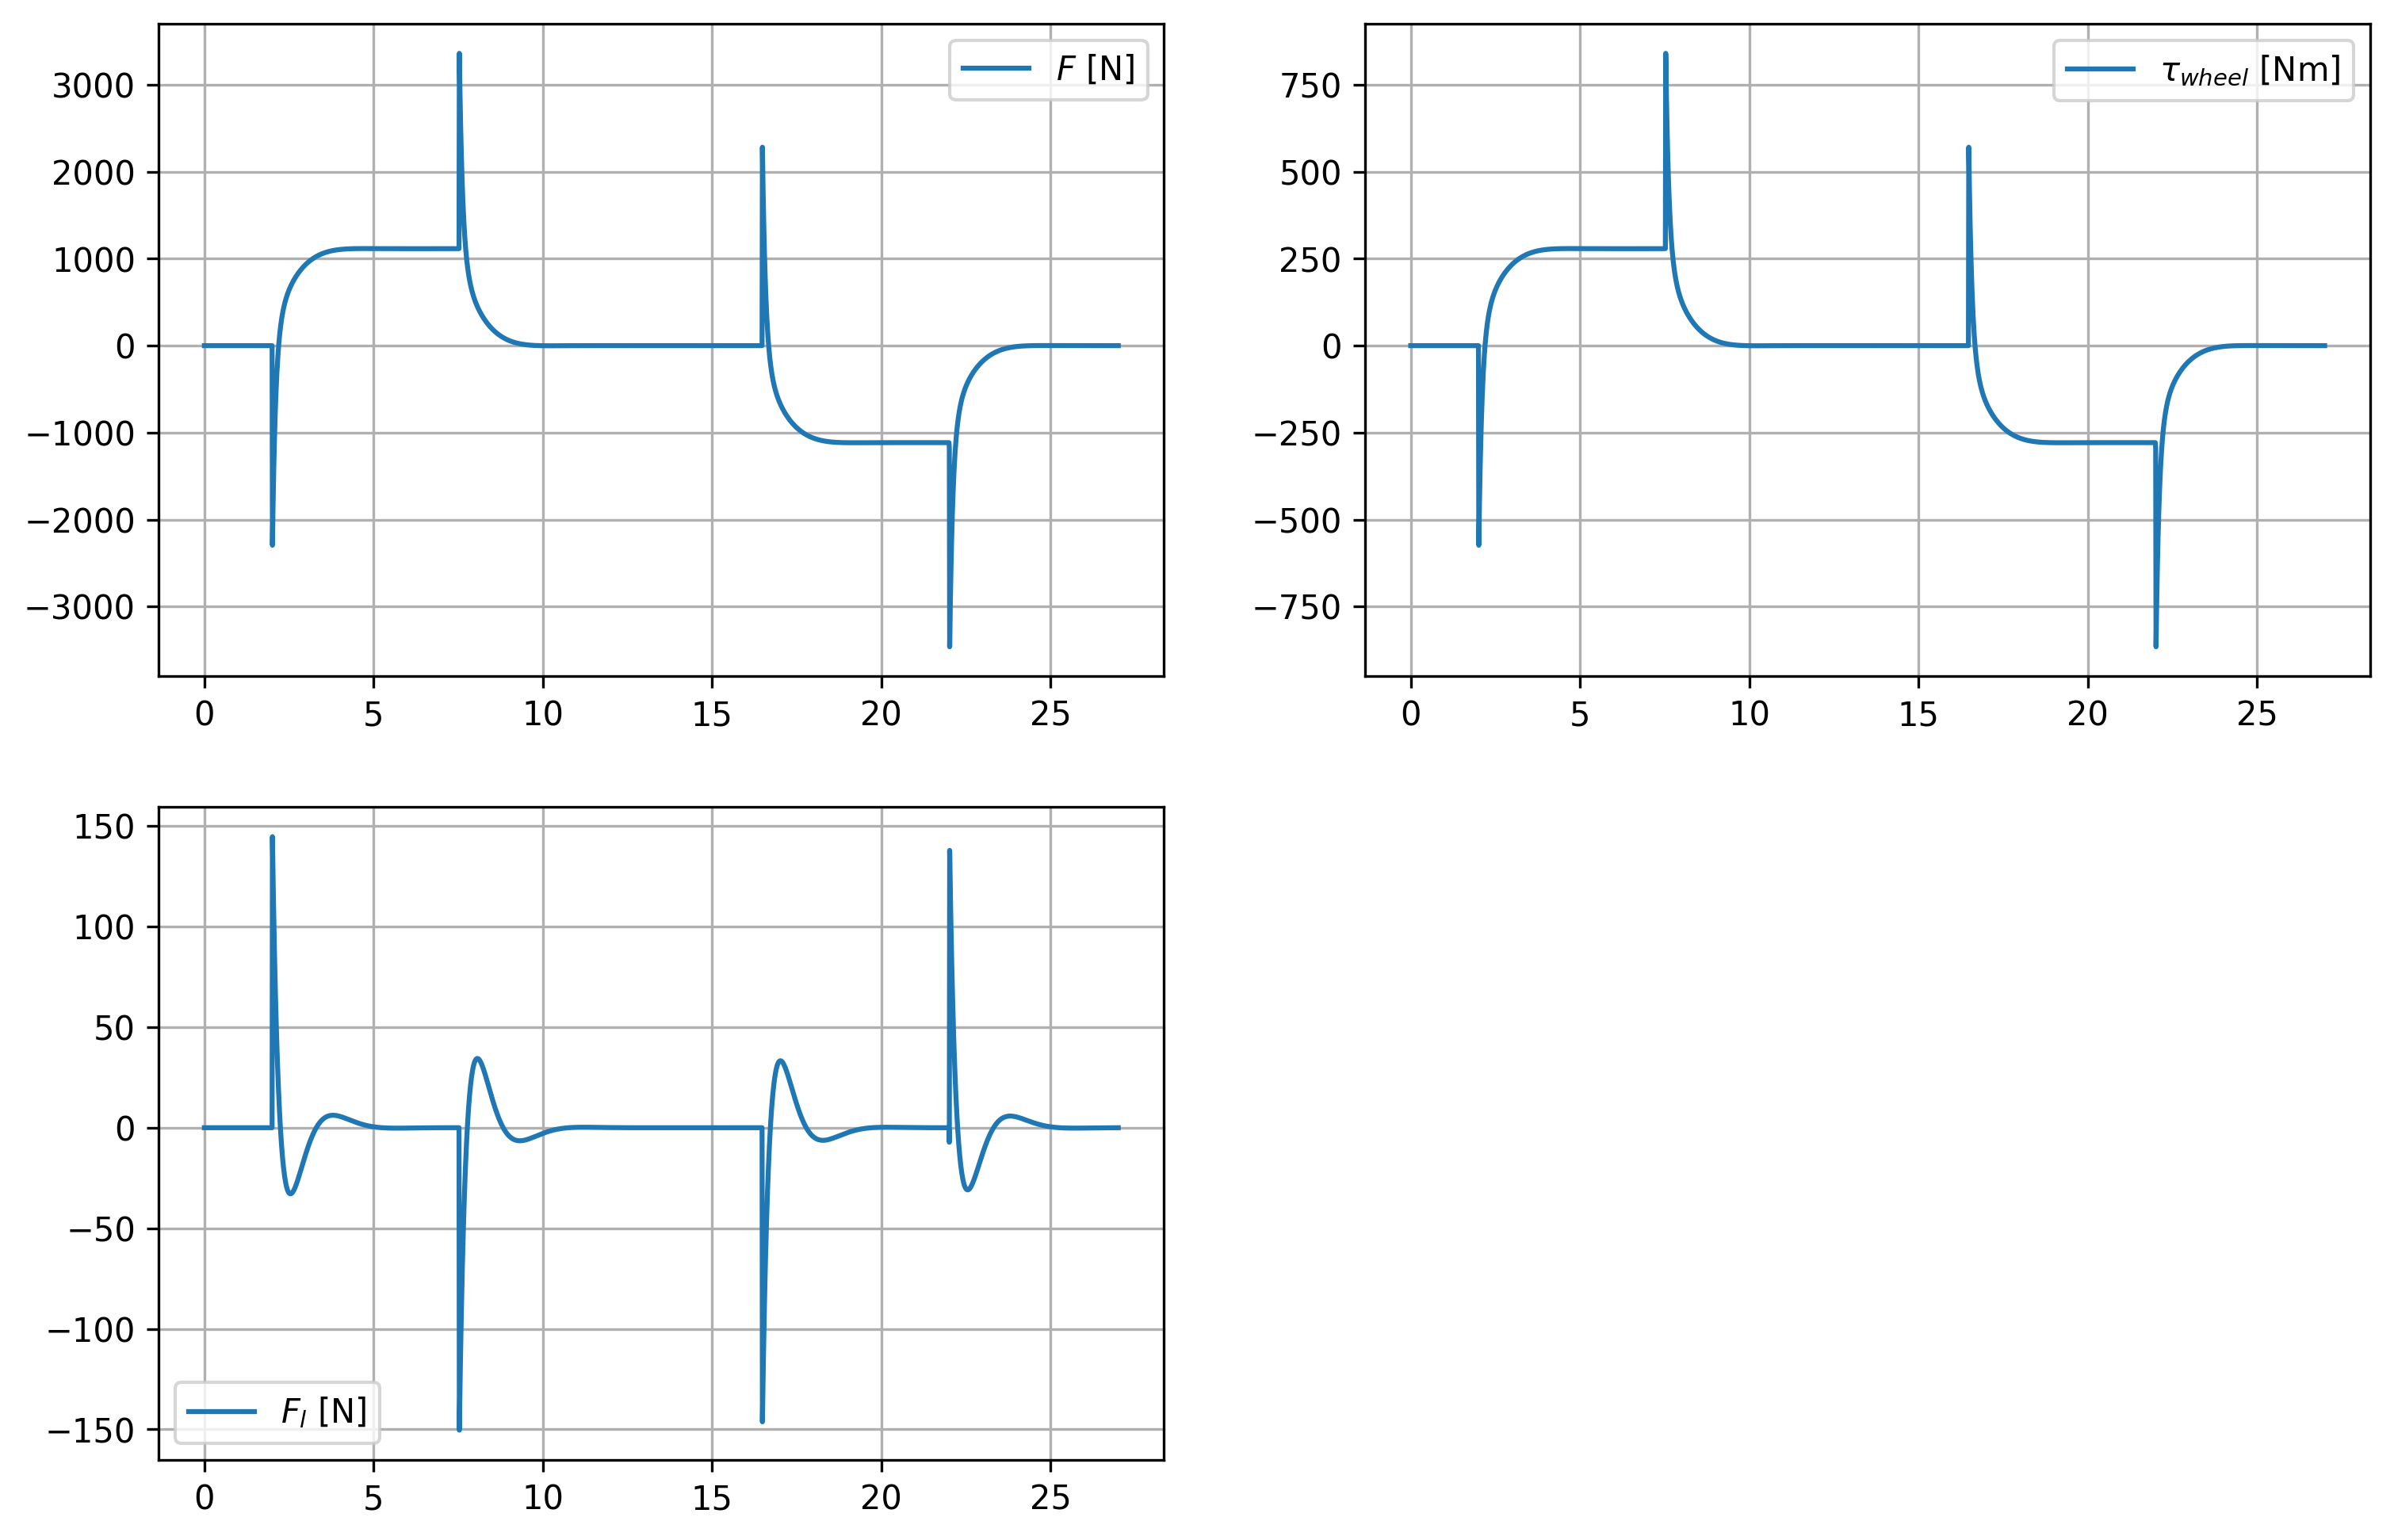

In [43]:
pl.figure(2, figsize=(12,8), dpi=300)
pl.subplot(221);
pl.plot(t_sim, u_sim[:,0]);
pl.legend(['$F$ [N]'], loc='best')
pl.grid()

pl.subplot(222);
pl.plot(t_sim, u_sim[:,0]*param[r]);
pl.legend([r'$\tau_{wheel}$ [Nm]'], loc='best')
pl.grid()

pl.subplot(223);
pl.plot(t_sim, u_sim[:,1]);
pl.legend([r'$F_l$ [N]'], loc='best')
pl.grid()

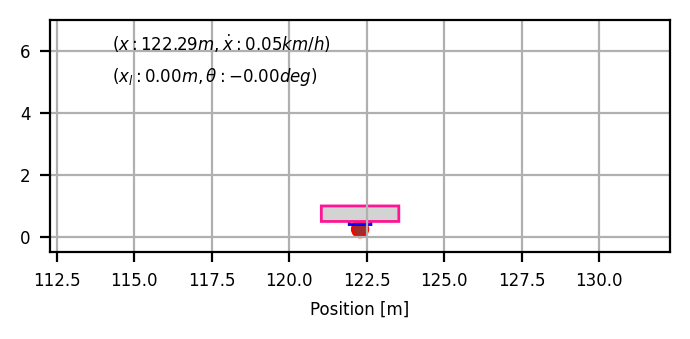

In [44]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure(3, figsize=(4,2), dpi=200)
ax = plt.axes()
plt.rcParams['font.size'] = '6'

data = x_sim

def draw_model(time):
    ax.cla()
    
    frame = time*10
    
    x = data[frame, 0]
    xdot = data[frame, 3]
    xl = -data[frame,1]
    th_rad = data[frame,2]
    th_deg = -data[frame,2]*180/np.pi
    
    radius = param[r]
    
    # configure
    x_wheel = x
    y_wheel = radius
       
    x_pen = x + (param[h_c] - param['c_height']/2)*np.sin(th_rad) - param['c_width']/2*np.cos(th_rad)
    y_pen = radius + (param[h_c] - param['c_height']/2)*np.cos(th_rad) + param['c_width']/2*np.sin(th_rad)
    
    x_torso = x + (param[h_t] - param['t_height']/2)*np.sin(th_rad) - (xl + param['t_width']/2)*np.cos(th_rad)
    y_torso = radius + (param[h_t] - param['t_height']/2)*np.cos(th_rad) + (xl + param['t_width']/2)*np.sin(th_rad)
    
    # wheel
    ax.add_patch(
        patches.Circle((x_wheel, y_wheel), 
                       radius,
                       edgecolor = 'red',
                       facecolor = 'brown',
                       fill=True,))
    
    # pend
    ax.add_patch(
        patches.Rectangle((x_pen, y_pen), 
                          param['c_width'], param['c_height'], th_deg,
                          edgecolor = 'blue',
                          facecolor = 'lightgray',
                          fill=False,))

    # torso
    ax.add_patch(
        patches.Rectangle((x_torso, y_torso), 
                          param['t_width'], param['t_height'], th_deg,
                          edgecolor = 'deeppink',
                          facecolor = 'lightgray',
                          fill=True,))
    
    # data show up
    ax.text(x-8, 6, 
            r'$(x:{%s}m, \dotx:{%s}km/h)$' % (format(x,'.2f'), format(xdot*3.6,'.2f')))
    ax.text(x-8, 5,        
            r'$(x_l:{%s}m, \theta:{%s}deg)$' % (format(-xl,'.2f'), format(-th_deg,'.2f')))
     
    ax.set_aspect('equal')
    ax.set_xlim([-10+x,10+x])
    ax.set_ylim([-0.5,7])
    ax.grid(axis='both')
    ax.set_xlabel('Position [m]', fontsize=6)

    time += 1 

anim = FuncAnimation(fig, draw_model, frames=int(len(t)/10), interval=100)
HTML(anim.to_html5_video())
#anim.save("dualmotion_segway.mp4",fps=20, dpi=200)
